**Importing packages and files**

In [ ]:
import zipfile
import os

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import files

# Upload the zip file containing your folder structure
uploaded = files.upload()

In [ ]:
# Specify the uploaded zip file name
zip_file_name = "Data_axial.zip"

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("/content")  # Extract to /content directory

# List the contents of the current directory
print(os.listdir("/content"))


['.config', 'Data_axial.zip', 'Data_axial', 'sample_data']


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

# *Assigning train and test data without direct validation split*

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory('/content/Data_axial/Training',
                                                         shuffle = True,
                                                         image_size = IMG_SIZE,
                                                         batch_size = BATCH_SIZE)

Found 1078 files belonging to 4 classes.


In [ ]:
test_data = tf.keras.utils.image_dataset_from_directory('/content/Data_axial/Testing',
                                                         shuffle = True,
                                                         image_size = IMG_SIZE,
                                                         batch_size = BATCH_SIZE)

Found 240 files belonging to 4 classes.


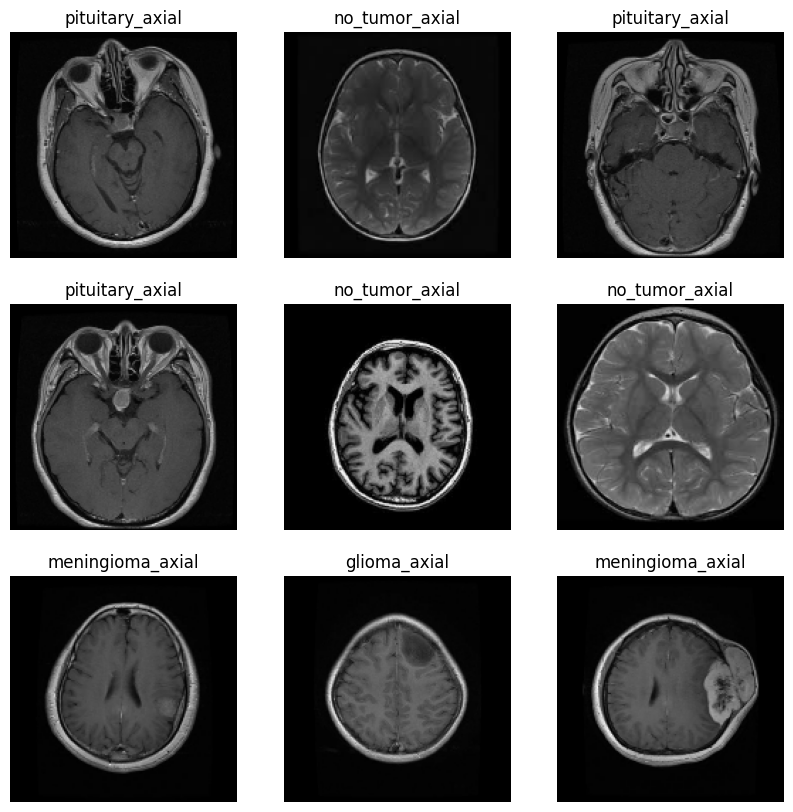

In [ ]:
class_names = train_data.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# *Assigning train and test data with direct validation split*

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/Data_axial/Training',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size= IMG_SIZE,
  batch_size= BATCH_SIZE)

Found 1078 files belonging to 4 classes.
Using 863 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/Data_axial/Training',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size= IMG_SIZE,
  batch_size= BATCH_SIZE)

Found 1078 files belonging to 4 classes.
Using 215 files for validation.


In [ ]:
class_names = train_ds.class_names

In [ ]:
print(class_names)

['glioma_axial', 'meningioma_axial', 'no_tumor_axial', 'pituitary_axial']
